Let's load uo our data, parse our dates, and extract the year from the dates. We will want to use the year to color our plots below.

In [1]:
import pandas as pd

BMW = '/kaggle/input/bmw-stock-data-1996-2024/BMW_Data.csv'
df = pd.read_csv(filepath_or_buffer=BMW, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume,year
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000,1996
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000,1996
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000,1996
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000,1996
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000,1996


First let's look at our price/volume correlations.

In [2]:
df[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj_Close,Close,High,Low,Open,Volume
Adj_Close,1.000000,0.942963,0.942642,0.943046,0.942340,-0.290352
Close,0.942963,1.000000,0.999667,0.999693,0.999323,-0.261445
High,0.942642,0.999667,1.000000,0.999547,0.999688,-0.255027
Low,0.943046,0.999693,0.999547,1.000000,0.999609,-0.267384
Open,0.942340,0.999323,0.999688,0.999609,1.000000,-0.260663
Volume,-0.290352,-0.261445,-0.255027,-0.267384,-0.260663,1.000000


What do we see? We don't have any perfect correlations, so we know we don't have any duplicate data. And we see that our prices and volumes are somewhat negatively correlated, as is typical for long stock time series.

Let's look at the price time series with a line plot.

<Axes: xlabel='Date', ylabel='Adj_Close'>

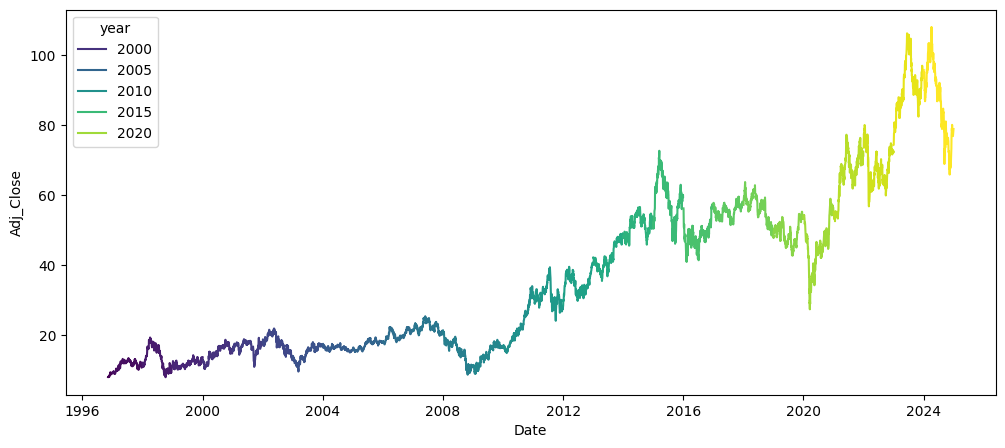

In [3]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
lineplot(palette='viridis', data=df, x='Date', y='Adj_Close', hue='year')

What do we see? We see a 12-year period where the stock appears to have traded in a range, followed by a substantial run-up from 2009 until 2023 or so, followed by a substantial drop-off. Let's look at the log of the price to see if we can see relative rather than absolute volatility.

<Axes: xlabel='Date', ylabel='Adj_Close'>

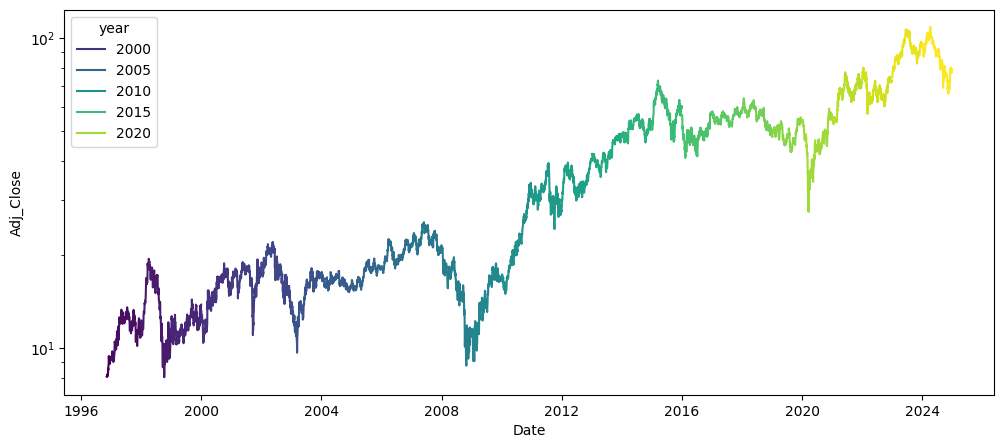

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette='viridis', data=df, x='Date', y='Adj_Close', hue='year')

What do we see? If we look a the log of the price over time, the price appears to have enjoyed a steady increase over the entire period of interest, with occasional setbacks.

Let's look at the volume over time. Because volume, unlike price, is not serially correlated, it makes more sense to look at the volume time series using a scatter plot.

<Axes: xlabel='Date', ylabel='Volume'>

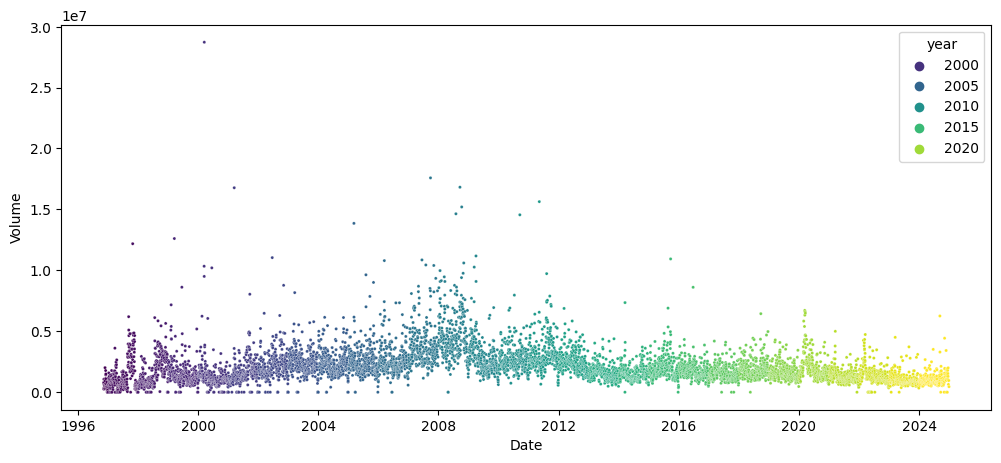

In [5]:
from seaborn import scatterplot

plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

Surprisingly, the volume looks flat over time, with occasional outliers. Again, let's look at the log of the volume to see if we can see any relative change in volume over time.

<Axes: xlabel='Date', ylabel='Volume'>

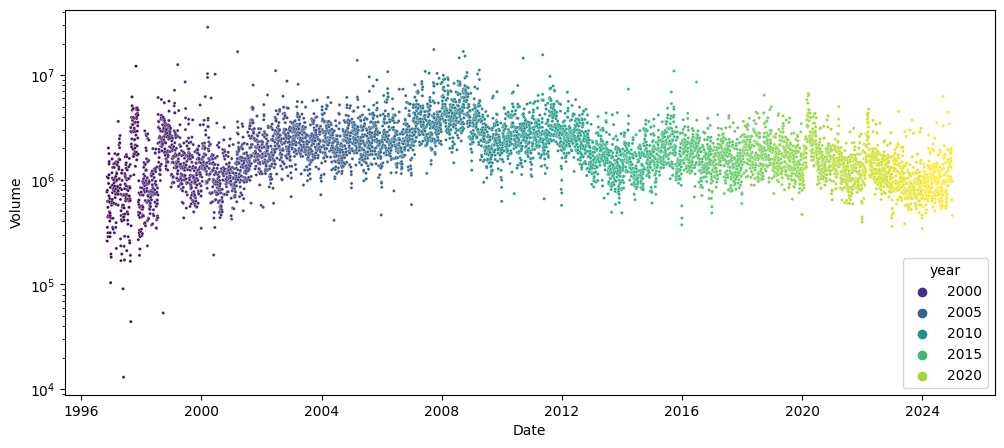

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

What do we see? It looks like volume drops off gradually over time, as we might expect for a stock that is appreciating slowly. Let's look at the volume as a function of the price.

<Axes: xlabel='Adj_Close', ylabel='Volume'>

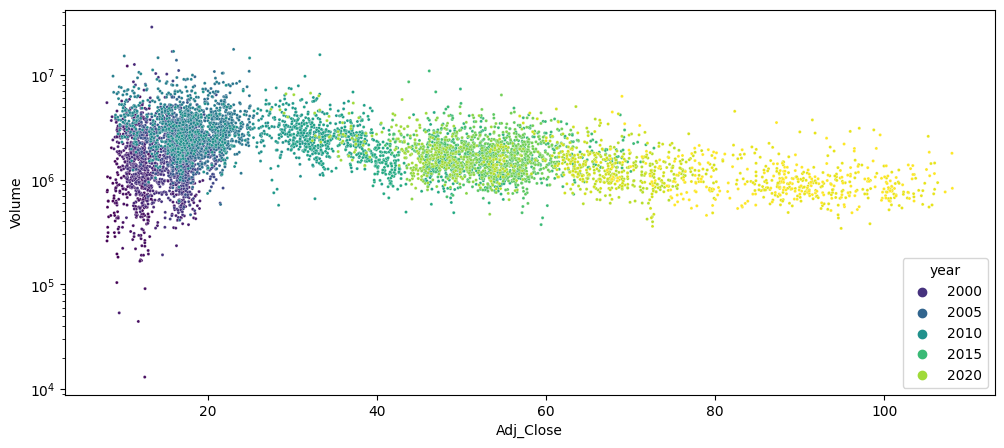

In [7]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Adj_Close', y='Volume', hue='year')

What do we see? We do see some price retrenchment, and we generally see that the log of the volume gradually declines as a function of the price, as we might expect from the moderate negative Pearson correlation above.